In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('./data')

['test.csv', 'train.csv', 'gender_submission.csv']

In [3]:
df_test = pd.read_csv('./data/test.csv')
df_train = pd.read_csv('./data/train.csv')
df_submission = pd.read_csv('./data/gender_submission.csv')

In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_test.shape, df_train.shape, df_submission.shape

((418, 11), (891, 12), (418, 2))

In [6]:
df = df_train.set_index('PassengerId')

In [7]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
cond = (df.Age >= 22.0) & (df.Age <= 35.0)
df.loc[cond, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [9]:
df.loc[4, 'Name'] # uses the index

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [10]:
df.iloc[4, :] # uses the location DataFrame --> Series

Survived                           0
Pclass                             3
Name        Allen, Mr. William Henry
Sex                             male
Age                               35
SibSp                              0
Parch                              0
Ticket                        373450
Fare                            8.05
Cabin                            NaN
Embarked                           S
Name: 5, dtype: object

In [11]:
type(df.iloc[4, 2])

str

In [12]:
pd.isnull(np.nan)

True

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
B39            1
B37            1
C99            1
C148           1
C54            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
def plot_box_num(df, col):
    age_notnan = df[col][~df.Age.isnull()]
    age_survived = df[col][(df.Survived==1) & ~df[col].isnull()]
    age_notsurvived = df[col][(df.Survived==0) & ~df[col].isnull()]
    plt.boxplot([age_notnan, age_survived, age_notsurvived])

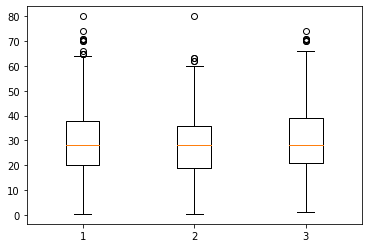

In [16]:
plot_box_num(df, 'Age')

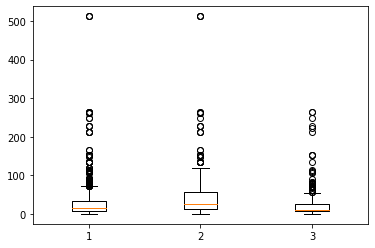

In [17]:
plot_box_num(df, 'Fare')

In [18]:
df[df.Age > 75]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [19]:
df[df.Fare > 200].sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [20]:
ticket_p = df.groupby('Ticket', as_index=False).agg({'Survived': 'count'})
ticket_p[ticket_p.Ticket == '24160']

,Ticket,Survived
141,24160,3


In [21]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
df_survived = df[df.Survived == 1]
df_notsurvived = df[df.Survived == 0]

In [23]:
df.Pclass.value_counts()/len(df)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [24]:
df_survived.Pclass.value_counts()/len(df_survived)

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

In [25]:
df_notsurvived.Pclass.value_counts()/len(df_notsurvived)

3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64

In [26]:
# hw:
# read about "joining/merging" of pandas
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
# review set theory: union, intersect
# Table 1:
# key value_1
# a    1
# b    2
# Table 2:
# key value_2
# a    3
# a    4
# Result Table (INNER JOIN):
# key v_1  v_2
# a   1     3
# a   1     4
# OUT JOIN, INNER JOIN